# Logistic Regression

This exercise comes from Dell's EMC Associate Data Analytics Certification 

##### We'll be Analysing Telecommunications Churn Data, with that we'll build a Logistic Regression Model and test it's accuracy to predict if a customer is going to churn or not based in historical data

### 1. Reading the Data and it's labels (Churn or Not)

In [4]:
# Storing it into a pandas dataframe
data <- read.csv("datasets/Telco-Customer-Churn.csv")

In [5]:
# Create Interval Tenure Variable
group_tenure <- function(tenure){
    if (tenure >= 0 && tenure <= 6){
        return('0-6 Month')
    }else if(tenure > 6 && tenure <= 12){
        return('6-12 Month')
    }else if (tenure > 12 && tenure <= 24){
        return('12-24 Month')
    }else if (tenure > 24 && tenure <=36){
        return('24-36 Month')
    }else if (tenure > 36 && tenure <=48){
        return('36-48 Month')
    }else if (tenure > 48 && tenure <= 62){
        return('48-62 Month')
    }else if (tenure > 62){
        return('> 62 Month')
    }
}

# apply group_tenure function on each row of dataframe
data$tenure_interval <- sapply(data$tenure,group_tenure)
data$tenure_interval <- as.factor(data$tenure_interval)


#Deleting some columns
col_keep = c("SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","InternetService",
            "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
            "Contract", "PaperlessBilling", "PaymentMethod","MonthlyCharges","TotalCharges","Churn","tenure_interval")
data <- subset(data, select = col_keep)


head(data)

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_interval
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-6 Month
2,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-36 Month
3,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-6 Month
4,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,36-48 Month
5,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-6 Month
6,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,6-12 Month


### 2. Explore Data

In [233]:
summary(data)

 SeniorCitizen    Partner    Dependents PhoneService          MultipleLines 
 Min.   :0.0000   No :3641   No :4933   No : 682     No              :3390  
 1st Qu.:0.0000   Yes:3402   Yes:2110   Yes:6361     No phone service: 682  
 Median :0.0000                                      Yes             :2971  
 Mean   :0.1621                                                             
 3rd Qu.:0.0000                                                             
 Max.   :1.0000                                                             
                                                                            
    InternetService             OnlineSecurity              OnlineBackup 
 DSL        :2421   No                 :3498   No                 :3088  
 Fiber optic:3096   No internet service:1526   No internet service:1526  
 No         :1526   Yes                :2019   Yes                :2429  
                                                                         
              

In [234]:
table(data$Churn)


  No  Yes 
5174 1869 

In [235]:
table(data$Contract, data$Churn)

                
                   No  Yes
  Month-to-month 2220 1655
  One year       1307  166
  Two year       1647   48

In [236]:
table(data$tenure_interval, data$Churn)

             
                No  Yes
  > 62 Month  1181   80
  0-6 Month    697  784
  12-24 Month  730  294
  24-36 Month  652  180
  36-48 Month  617  145
  48-62 Month  845  133
  6-12 Month   452  253

In [237]:
table(data$InternetService, data$Churn)

             
                No  Yes
  DSL         1962  459
  Fiber optic 1799 1297
  No          1413  113

In [238]:
# Are there missing values?
any(is.na(data))

[1] TRUE

In [239]:
nrow(data) # of rows without cleaning NAs
data_nona <- na.omit(data)
nrow(data_nona) # of rows after cleaning NAs

[1] 7043

[1] 7032

In [240]:
# Converting Variables into factors
data_nona$MultipleLines <- as.factor(data_nona$MultipleLines)
data_nona$OnlineSecurity <- as.factor(data_nona$OnlineSecurity)
data_nona$OnlineBackup <- as.factor(data_nona$OnlineBackup)
data_nona$DeviceProtection <- as.factor(data_nona$DeviceProtection)
data_nona$TechSupport <- as.factor(data_nona$TechSupport)
data_nona$StreamingTV <- as.factor(data_nona$StreamingTV)
data_nona$StreamingMovies <- as.factor(data_nona$StreamingMovies)

### 3. Splitting Datasets

In [241]:
#!install.packages("caTools")
library(caTools)
sample <- sample.split(data_nona$Churn, SplitRatio=0.75)
trainData <- subset(data_nona, sample == TRUE)
testData <- subset(data_nona, sample == FALSE)
nrow(trainData)
nrow(testData)

[1] 5274

[1] 1758

### 4.1 Building the baseline Model

In [242]:
# Building Model with all variables
mylogit <- glm(Churn ~ .,
              data = trainData, family=binomial(link="logit"),
              na.action=na.pass)
summary(mylogit)


Call:
glm(formula = Churn ~ ., family = binomial(link = "logit"), data = trainData, 
    na.action = na.pass)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1559  -0.6580  -0.2858   0.6146   3.1384  

Coefficients: (7 not defined because of singularities)
                                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)                          -3.134e-01  9.895e-01  -0.317  0.75142    
SeniorCitizen                         1.776e-01  9.810e-02   1.810  0.07030 .  
PartnerYes                            8.600e-02  9.081e-02   0.947  0.34361    
DependentsYes                        -1.300e-01  1.041e-01  -1.249  0.21173    
PhoneServiceYes                       7.424e-01  7.511e-01   0.988  0.32295    
MultipleLinesNo phone service                NA         NA      NA       NA    
MultipleLinesYes                      6.345e-01  2.066e-01   3.071  0.00213 ** 
InternetServiceFiber optic            2.581e+00  9.257e-01   2.788  0.00531 ** 

### 4.2 Variable Selection to handle lots of insignificant variables (there are too many)

In [243]:
# NULL MODEL
# variable selection using stepwise regression
# the intercept model
model.null = glm(Churn ~ 1,
                data=trainData,
                family = binomial(link="logit"))
summary(model.null)


Call:
glm(formula = Churn ~ 1, family = binomial(link = "logit"), data = trainData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7862  -0.7862  -0.7862   1.6278   1.6278  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.01587    0.03117  -32.59   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 6108  on 5273  degrees of freedom
Residual deviance: 6108  on 5273  degrees of freedom
AIC: 6110

Number of Fisher Scoring iterations: 4


In [244]:
# Model with all required attributes included
# . in the formula only indicates the usage of all the available metrics
model.full = glm(Churn ~ .,
                data = trainData,
                family = binomial(link="logit"))
summary(model.full)

#Variable Selection:
# Each iteration the AIC gets better (going low, )


Call:
glm(formula = Churn ~ ., family = binomial(link = "logit"), data = trainData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1559  -0.6580  -0.2858   0.6146   3.1384  

Coefficients: (7 not defined because of singularities)
                                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)                          -3.134e-01  9.895e-01  -0.317  0.75142    
SeniorCitizen                         1.776e-01  9.810e-02   1.810  0.07030 .  
PartnerYes                            8.600e-02  9.081e-02   0.947  0.34361    
DependentsYes                        -1.300e-01  1.041e-01  -1.249  0.21173    
PhoneServiceYes                       7.424e-01  7.511e-01   0.988  0.32295    
MultipleLinesNo phone service                NA         NA      NA       NA    
MultipleLinesYes                      6.345e-01  2.066e-01   3.071  0.00213 ** 
InternetServiceFiber optic            2.581e+00  9.257e-01   2.788  0.00531 ** 
InternetServiceNo        

### Variable Selection

In [245]:
step(model.null,
    scope = list(upper=model.full),
    direction="forward", 
     test = "Chisq", 
     data = trainData)

#AIC is an estimator of how good the model is

Start:  AIC=6110.02
Churn ~ 1

                   Df Deviance    AIC     LRT  Pr(>Chi)    
+ Contract          2   5055.1 5061.1 1052.90 < 2.2e-16 ***
+ tenure_interval   6   5370.8 5384.8  737.19 < 2.2e-16 ***
+ OnlineSecurity    2   5421.1 5427.1  686.97 < 2.2e-16 ***
+ TechSupport       2   5433.4 5439.4  674.60 < 2.2e-16 ***
+ InternetService   2   5475.2 5481.2  632.83 < 2.2e-16 ***
+ OnlineBackup      2   5580.7 5586.7  527.37 < 2.2e-16 ***
+ DeviceProtection  2   5614.5 5620.5  493.55 < 2.2e-16 ***
+ PaymentMethod     3   5657.2 5665.2  450.80 < 2.2e-16 ***
+ StreamingMovies   2   5749.4 5755.4  358.63 < 2.2e-16 ***
+ StreamingTV       2   5751.3 5757.3  356.71 < 2.2e-16 ***
+ TotalCharges      1   5884.3 5888.3  223.74 < 2.2e-16 ***
+ MonthlyCharges    1   5885.5 5889.5  222.52 < 2.2e-16 ***
+ PaperlessBilling  1   5894.0 5898.0  213.99 < 2.2e-16 ***
+ Dependents        1   5962.0 5966.0  146.04 < 2.2e-16 ***
+ SeniorCitizen     1   5999.6 6003.6  108.38 < 2.2e-16 ***
+ Partner


Call:  glm(formula = Churn ~ Contract + InternetService + tenure_interval + 
    PaperlessBilling + MultipleLines + StreamingMovies + OnlineSecurity + 
    PaymentMethod + TechSupport + StreamingTV + OnlineBackup + 
    SeniorCitizen, family = binomial(link = "logit"), data = trainData)

Coefficients:
                         (Intercept)                      ContractOne year  
                             -2.6556                               -0.7844  
                    ContractTwo year            InternetServiceFiber optic  
                             -1.6843                                1.0018  
                   InternetServiceNo              tenure_interval0-6 Month  
                             -0.8736                                2.2076  
          tenure_interval12-24 Month            tenure_interval24-36 Month  
                              0.9403                                0.5269  
          tenure_interval36-48 Month            tenure_interval48-62 Month  
   

### Last Model

In [246]:
logmodel <- glm(Churn ~ Contract + InternetService + tenure_interval + PaperlessBilling + SeniorCitizen +
                StreamingTV + TechSupport + PaymentMethod + StreamingMovies + MultipleLines + MonthlyCharges +
                TotalCharges,
                data = trainData, family=binomial(link="logit"),
                na.action=na.pass
               )
summary(logmodel)


Call:
glm(formula = Churn ~ Contract + InternetService + tenure_interval + 
    PaperlessBilling + SeniorCitizen + StreamingTV + TechSupport + 
    PaymentMethod + StreamingMovies + MultipleLines + MonthlyCharges + 
    TotalCharges, family = binomial(link = "logit"), data = trainData, 
    na.action = na.pass)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1843  -0.6573  -0.2877   0.6076   3.1498  

Coefficients: (3 not defined because of singularities)
                                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)                          -9.712e-01  6.205e-01  -1.565  0.11756    
ContractOne year                     -7.744e-01  1.262e-01  -6.136 8.45e-10 ***
ContractTwo year                     -1.686e+00  2.073e-01  -8.132 4.21e-16 ***
InternetServiceFiber optic            1.842e+00  2.739e-01   6.727 1.74e-11 ***
InternetServiceNo                    -1.655e+00  3.399e-01  -4.870 1.12e-06 ***
tenure_interval0-6 Month            

### Evaluate Model

In [247]:
# Compute Pseudo R-squares (not a very good measure for logistic reg, RUC Function is better)
attributes(mylogit)
pseudorsquare <- 1 - with(mylogit, deviance/null.deviance)
pseudorsquare

$names
 [1] "coefficients"      "residuals"         "fitted.values"    
 [4] "effects"           "R"                 "rank"             
 [7] "qr"                "family"            "linear.predictors"
[10] "deviance"          "aic"               "null.deviance"    
[13] "iter"              "weights"           "prior.weights"    
[16] "df.residual"       "df.null"           "y"                
[19] "converged"         "boundary"          "model"            
[22] "call"              "formula"           "terms"            
[25] "data"              "offset"            "control"          
[28] "method"            "contrasts"         "xlevels"          

$class
[1] "glm" "lm"

[1] 0.2946219

### Try to Improve the Model Reordering the Factors

In [248]:
# Ordering a Field to see if model gets better 
# We'll start ordering by the Contract Variable, starting at "Two Year"
trainData$Contract = relevel(as.factor(trainData$Contract), "Two year")

# Running model again
ordered_model <- glm(Churn ~ Contract + InternetService + tenure_interval + PaperlessBilling + SeniorCitizen +
                StreamingTV + TechSupport + PaymentMethod + StreamingMovies + MultipleLines + MonthlyCharges +
                TotalCharges,
                data = trainData, family=binomial(link="logit"),
                na.action=na.pass
               )
# summary(ordered_model) - Didn't improve

### Plot ROC Curve

In [249]:
# !install.packages("bitops")
# !install.packages("caTools")
# !install.packages("ROCR")
library(bitops)
library(caTools)
library(ROCR)

### Predict value of churn based in our Logistic Model

In [250]:
pred = predict(logmodel, newdata= testData, type="response") # Returns % of Being True 
predObj = prediction(pred, testData$Churn) # prediction object needed by ROCR

#do the same for null model
pred_null = predict(model.null, newdata= testData, type="response") # Returns % of Being True 
predObj_null = prediction(pred_null, testData$Churn) # prediction object needed by ROCR

# ?performance

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


In [251]:
# auc for our model
rocObj = performance(predObj, measure="tpr", x.measure="fpr")
aucObj = performance(predObj, measure = "auc")
auc = aucObj@y.values[[1]]
auc #here

# see auc for null model
rocObj_null = performance(predObj_null, measure="tpr", x.measure="fpr")
aucObj_null = performance(predObj_null, measure = "auc")
auc_null = aucObj_null@y.values[[1]]
auc_null # here

# Our model is around 30% better than a null/dummy model

[1] 0.8399735

[1] 0.5

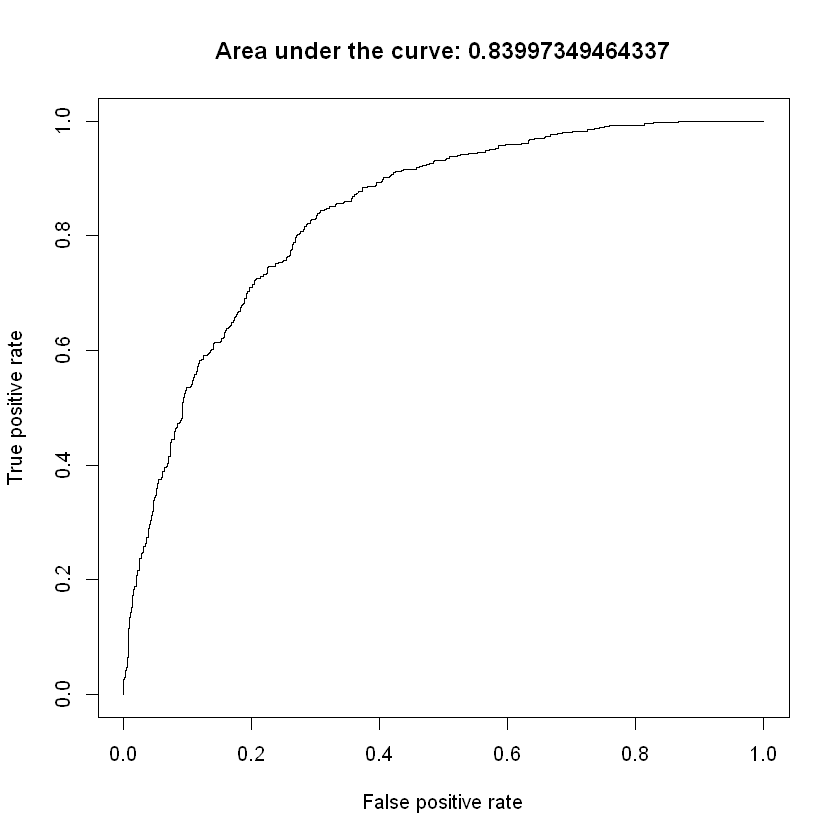

In [252]:
# Plot AUC Chart - The higher the better
plot(rocObj, main = paste("Area under the curve:", auc))

### Do predections: "Yes" or "No" to Churn

In [253]:
fitted.results <- ifelse(pred > 0.5, "Yes", "No")

# calculating the misclasification rate
miscError <- mean(fitted.results!=testData$Churn)
print("MisClasification Error Rate is:")
miscError

# calculating accuracy rate
accuracyRate <- 1-miscError
print("Accuracy Rate is:")
accuracyRate

[1] "MisClasification Error Rate is:"


[1] 0.1973834

[1] "Accuracy Rate is:"


[1] 0.8026166

### Do some "Client" Prediction varying on "Monthly Charges" to see if we get yes or no

In [254]:
newdata1 <- data.frame(MonthlyCharges=seq(min(data_nona$MonthlyCharges), max(data_nona$MonthlyCharges),10), #10 search values
                       tenure_interval=c("12-24 Month"),
                       Contract=c("One Year"),
                       InternetService=c("Fiber optic"),
                       PaperlessBilling=c("Yes"),
                       SeniorCitizen=0,
                       StreamingTV = c("Yes"),
                       TechSupport = c("Yes"),
                       PaymentMethod = c("Electronic check"),
                       StreamingMovies = c("Yes"),
                       MultipleLines = c("Yes"),
                       TotalCharges=1000
                      )
# Deleting some columns that are generating problems for the next jupyter cell
col_keep = c("MonthlyCharges","tenure_interval","Contract","InternetService","PaperlessBilling","SeniorCitizen",
            "StreamingTV","TechSupport","PaymentMethod","StreamingMovies","MultipleLines","TotalCharges")
newdata1 <- subset(data, select = col_keep)
head(newdata1)

,MonthlyCharges,tenure_interval,Contract,InternetService,PaperlessBilling,SeniorCitizen,StreamingTV,TechSupport,PaymentMethod,StreamingMovies,MultipleLines,TotalCharges
,<dbl>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,29.85,0-6 Month,Month-to-month,DSL,Yes,0,No,No,Electronic check,No,No phone service,29.85
2,56.95,24-36 Month,One year,DSL,No,0,No,No,Mailed check,No,No,1889.50
3,53.85,0-6 Month,Month-to-month,DSL,Yes,0,No,No,Mailed check,No,No,108.15
4,42.30,36-48 Month,One year,DSL,No,0,No,Yes,Bank transfer (automatic),No,No phone service,1840.75
5,70.70,0-6 Month,Month-to-month,Fiber optic,Yes,0,No,No,Electronic check,No,No,151.65
6,99.65,6-12 Month,Month-to-month,Fiber optic,Yes,0,Yes,No,Electronic check,Yes,Yes,820.50


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


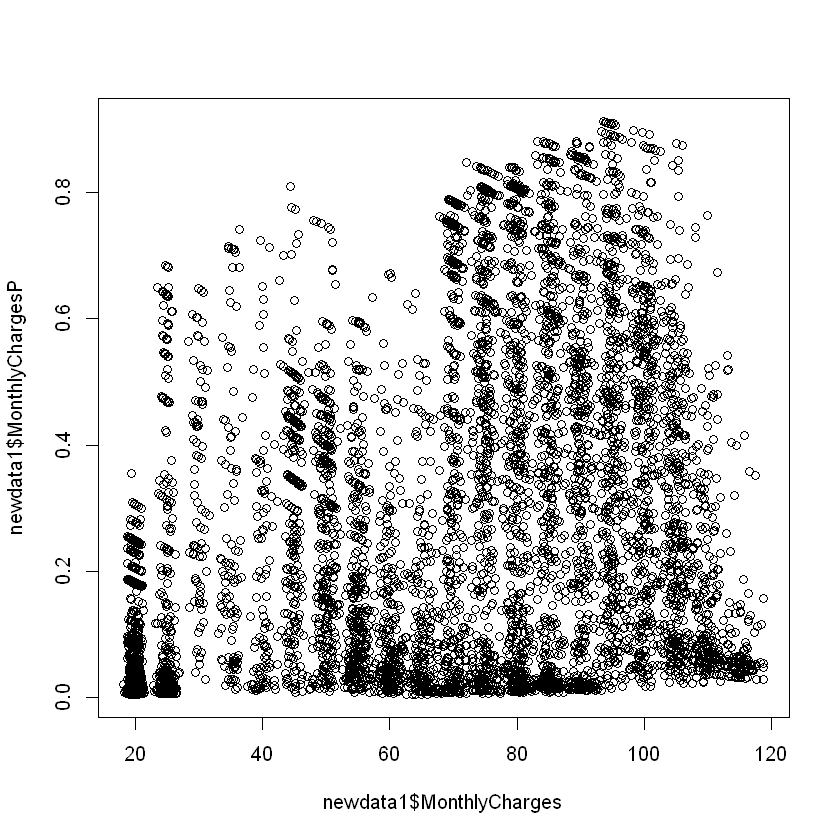

In [255]:
newdata1$MonthlyChargesP <- predict(logmodel, newdata=newdata1, type="response")
a <- cbind(newdata1$MonthlyCharges, newdata1$MonthlyChargesP)
plot(newdata1$MonthlyCharges, newdata1$MonthlyChargesP)